## __Técnica:__ K Neighbors Classifier (K vizinhos mais próximos)

__Conceito:__ O algoritmo k-vizinhos mais próximos (k-NN) é um método não-paramétrico utilizado para a classificação e regressão. Em ambos os casos, a entrada consistem em calcular a distância entre os k exemplos de treinamento mais próximos. 

Na classificação com o k-NN, a saída é uma associação com uma classe. 

Um objeto é classificado pela votação majoritária da classe dos vizinhos, sendo o objeto atribuído à classe mais comum dentre seus k vizinhos mais próximos.

__Estratégia:__ Utiliza cálculo da distância euclidiana para determinar a distância entre dois pontos, ordenar por mais próximo e classificar a classe.

__Hiperparâmetro__: 
* n_neighbors: Número de vizinho (padrão: 5)

__Exemplo:__

n_neighbors = 3
<img src="img/knn.png">

In [1]:
# Bibliotecas

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import itertools
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Método para plotar matriz de confusão

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão normalizada")
    else:
        print('Matriz de Confusão não normalizada')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## __Mostra os dados__:

In [3]:
# Recebe o arquivo de dataset, nomeia as labels e mostra o dataframe
data = '~/Letter-Recognition/data_set/letter-recognition.data'
columns = ['lettr','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
df = pd.read_csv(data, names = columns)

df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
lettr    20000 non-null object
x-box    20000 non-null int64
y-box    20000 non-null int64
width    20000 non-null int64
high     20000 non-null int64
onpix    20000 non-null int64
x-bar    20000 non-null int64
y-bar    20000 non-null int64
x2bar    20000 non-null int64
y2bar    20000 non-null int64
xybar    20000 non-null int64
x2ybr    20000 non-null int64
xy2br    20000 non-null int64
x-ege    20000 non-null int64
xegvy    20000 non-null int64
y-ege    20000 non-null int64
yegvx    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


## __Gráfico de disperção dos dados__

Neste gráfico de dispersão é possível observar o agrupamento dos dados similares para cada classe ao combinar suas características.

__Classes__: Todas as letras do alfabeto inglês (_lettr_)

__Features__: _x-box, y-box, width, high, onpix, x-bar, y-bar, x2bar, y2bar, xybar, x2ybr, xy2br, x-ege, xegvy, y-ege, yegvx_

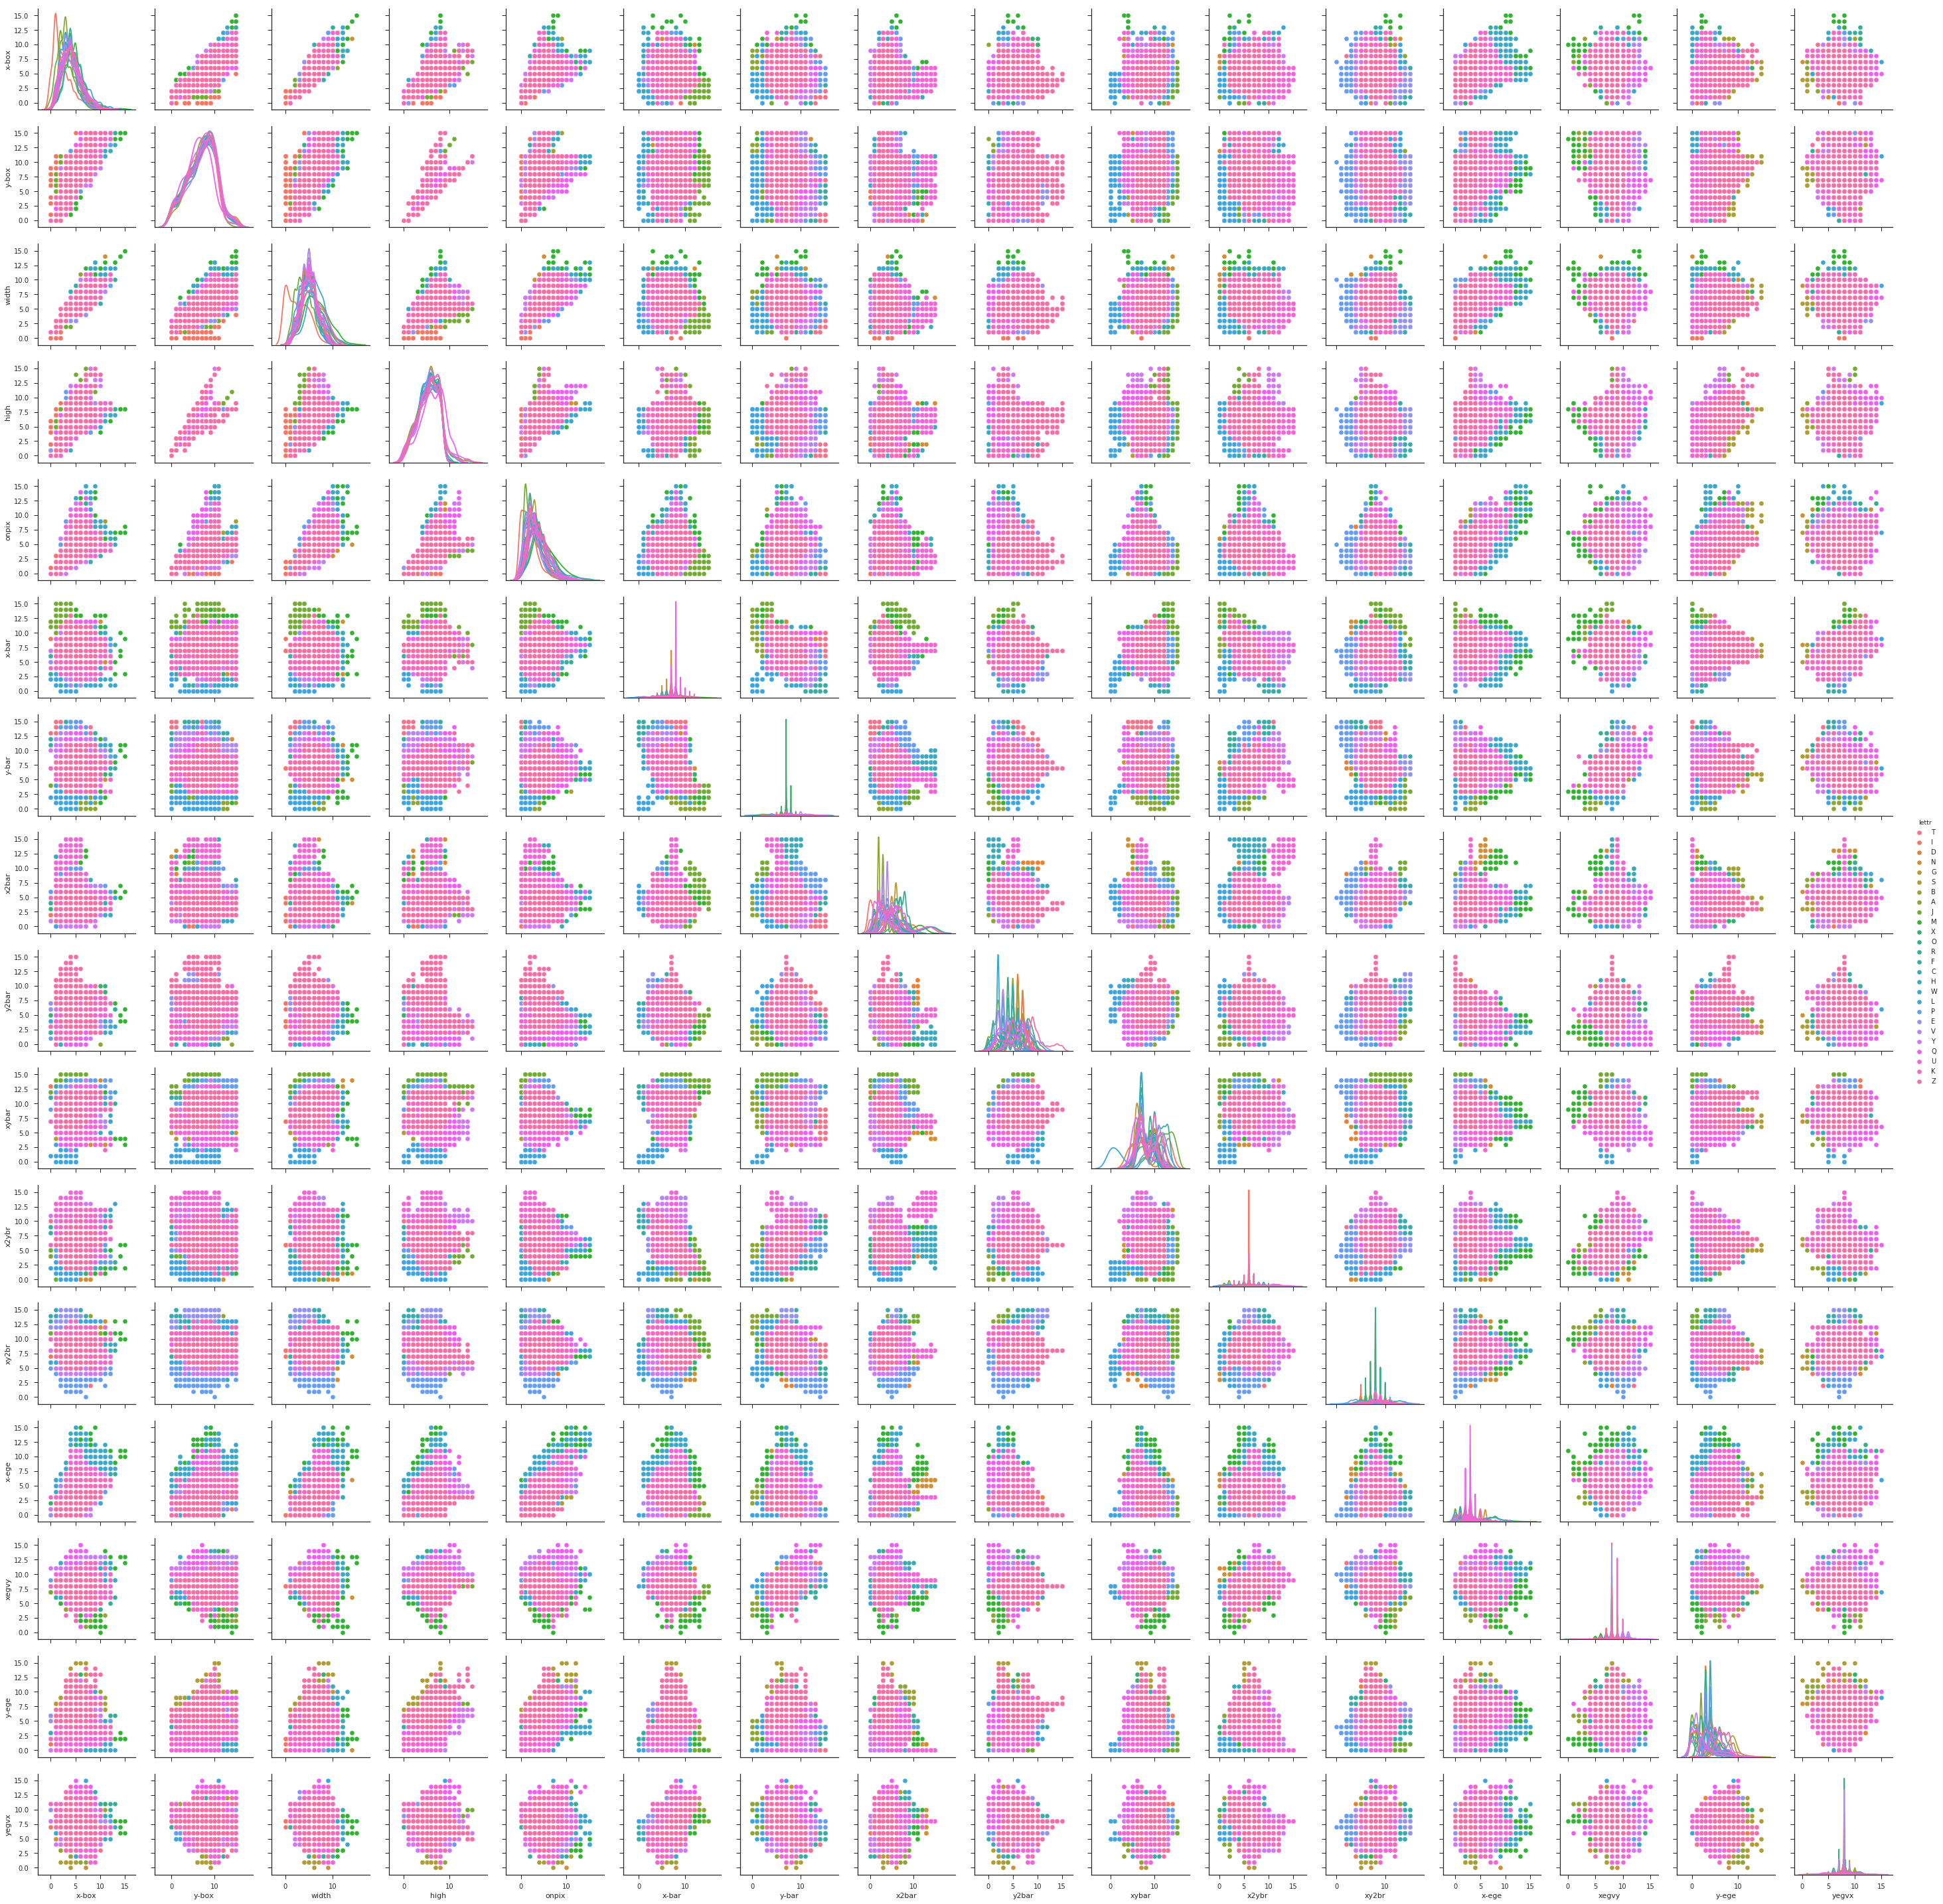

In [6]:
sb.set(style="ticks", color_codes=True)
g = sb.pairplot(df, hue="lettr", diag_kind="kde")

__Exemplo de dispesão dos dados nas características x-box e y-box:__
<img src="img/dispersao_x_y.png">

In [7]:
# Retirando as classes para selecionar apenas as features
X = np.array(df.drop('lettr', 1))
X

array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ...,
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 2,  3,  4, ...,  9,  5,  8],
       [ 4,  9,  6, ...,  7,  2,  8]])

In [8]:
# Selecionar apenas as classes
y = np.array(df.lettr)
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [9]:
# Algoritmo do método classificador k-vizinhos próximos
knn = KNeighborsClassifier()

# Divide os dados em conjunto de treinamento e em conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Treina os dados de teste
y_pred = knn.fit(X_train, y_train).predict(X_test)

## __Resultado da Acurácia__

In [10]:
accuracy = knn.score(X_test, y_test)
print(float(accuracy))

0.9572


## __Relatório de Precision, Recall e F1-score__

In [11]:
predicted = knn.predict(X_test)
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          A       0.98      0.99      0.99       180
          B       0.90      0.96      0.93       206
          C       0.97      0.97      0.97       196
          D       0.89      0.96      0.93       212
          E       0.94      0.95      0.95       186
          F       0.95      0.95      0.95       201
          G       0.97      0.93      0.95       221
          H       0.91      0.90      0.91       156
          I       0.96      0.97      0.96       181
          J       0.97      0.95      0.96       196
          K       0.94      0.90      0.92       174
          L       0.98      0.97      0.98       189
          M       0.99      0.97      0.98       210
          N       0.95      0.97      0.96       171
          O       0.94      0.95      0.95       191
          P       0.97      0.94      0.96       208
          Q       0.94      0.97      0.96       175
          R       0.93      0.91      0.92   

## __Matriz de confusão__

In [12]:
# Computa a matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

Matriz de Confusão não normalizada
[[179   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  1 197   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   3
    0   0   0   4   0   0   0   0]
 [  0   0 191   0   0   0   2   0   0   0   0   0   0   0   2   0   1   0
    0   0   0   0   0   0   0   0]
 [  1   1   0 204   0   0   0   1   0   0   1   0   0   0   3   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   2   0 177   0   2   0   0   0   0   1   0   0   0   0   2   0
    0   0   0   0   0   1   0   1]
 [  0   2   0   0   0 191   0   0   0   0   0   0   0   2   0   4   0   0
    0   1   0   0   1   0   0   0]
 [  0   2   0   5   5   0 206   0   0   0   0   0   0   0   1   0   0   0
    1   0   0   1   0   0   0   0]
 [  0   3   0   5   0   0   1 141   0   0   3   0   1   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0 175   5   0   0   0   0   0   0   0   0
    0   0   0   0  

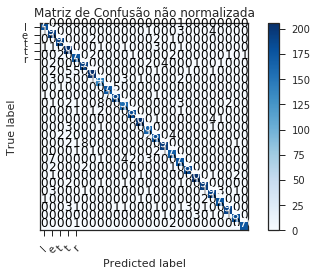

In [13]:
# Plota matriz de confusão não normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes="lettr",
                      title='Matriz de Confusão não normalizada')

Matriz de Confusão normalizada
[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.96 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.01 0.   0.   0.   0.02 0.   0.   0.   0.  ]
 [0.   0.   0.97 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
  0.01 0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.96 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.95 0.   0.01 0.   0.   0.   0.   0.01 0.   0.
  0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.01 0.   0.01]
 [0.   0.01 0.   0.   0.   0.95 0.   0.   0.   0.   0.   0.   0.   0.01
  0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.02 0.02 0.   0.93 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.02 0.   0.03 0.   0.   0.01

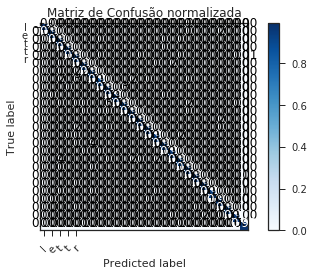

In [14]:
#Plota matriz de confusão normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes="lettr", normalize=True,
                      title='Matriz de Confusão normalizada')